In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.optimizers import SGD

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize pixel values (0-255 -> 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [4]:
# Split Validation Set from Training Set
# Reserve last 5000 samples for validation
x_val = x_train[-5000:]
y_val = y_train[-5000:]

x_tr = x_train[:-5000]
y_tr = y_train[:-5000]

In [5]:
print("Train shape:", x_tr.shape)
print("Validation shape:", x_val.shape)
print("Test shape:", x_test.shape)

Train shape: (55000, 28, 28)
Validation shape: (5000, 28, 28)
Test shape: (10000, 28, 28)


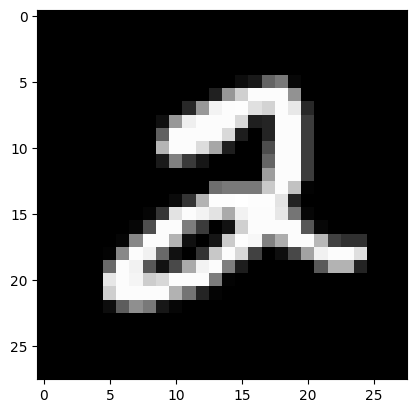

In [6]:
plt.imshow(x_train[5], cmap = "gray")

In [ ]:
x_test[14].shape

(28, 28)

In [ ]:
# Build Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val)
)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8740 - loss: 0.4490 - val_accuracy: 0.9688 - val_loss: 0.1204
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9621 - loss: 0.1269 - val_accuracy: 0.9718 - val_loss: 0.0980
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9751 - loss: 0.0834 - val_accuracy: 0.9760 - val_loss: 0.0930
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9811 - loss: 0.0612 - val_accuracy: 0.9756 - val_loss: 0.0824
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9863 - loss: 0.0449 - val_accuracy: 0.9782 - val_loss: 0.0777
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9905 - loss: 0.0318 - val_accuracy: 0.9796 - val_loss: 0.0808
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9920 - loss: 0.0258 - val_accuracy: 0.9798 - val_loss: 0.0758
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9925 - loss: 0.0237 - 

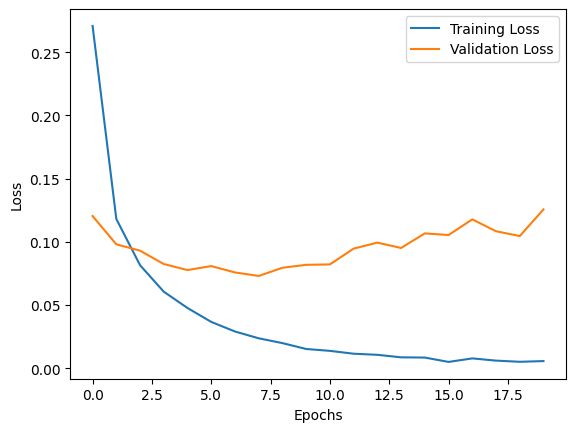

In [ ]:
# Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate on Test Set
print("Final evaluation on test data:")
model.evaluate(x_test, y_test)

Final evaluation on test data:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9738 - loss: 0.1431


[0.11636698991060257, 0.978600025177002]

In [ ]:
# Predict Example
sample = x_test[13].reshape(1, 28, 28)
pred = model.predict(sample)
print("Predicted Label:", np.argmax(pred))
print("True Label:", y_test[13])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
Predicted Label: 0
True Label: 0


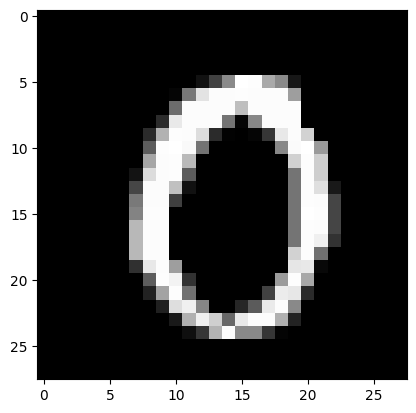

In [ ]:
plt.imshow(x_test[13], cmap="gray")
plt.show()

# Task 1 — Deep Prediction Analysis

In [ ]:
# Predict Example
sample = x_test[10].reshape(1, 28, 28)
pred = model.predict(sample)
print("Predicted Label:", np.argmax(pred))
print("True Label:", y_test[10])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Label: 0
True Label: 0


In [ ]:
# Predict Example
sample = x_test[20].reshape(1, 28, 28)
pred = model.predict(sample)
print("Predicted Label:", np.argmax(pred))
print("True Label:", y_test[20])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Label: 9
True Label: 9


In [ ]:
# Predict Example
sample = x_test[1003].reshape(1, 28, 28)
pred = model.predict(sample)
print("Predicted Label:", np.argmax(pred))
print("True Label:", y_test[1003])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Label: 5
True Label: 5


# Task 2 — Custom Image Generalization Test

In [ ]:
# image without any marign "number 5" First_Try
img = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)

# 2. Resize to 28x28
img = cv2.resize(img, (28, 28))

# 3. Normalize (0-1)
img = img / 255.0

# 4. Reshape to match model input
img = img.reshape(1, 28, 28)

# 5. Predict
prediction = model.predict(img)
print("Prediction:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: 3


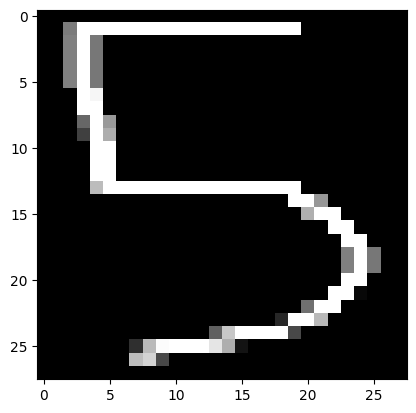

In [ ]:
plt.imshow(img.reshape(28,28), cmap="gray")
plt.show()

In [ ]:
# image without any marign "number 5" Second_Try
img_2 = cv2.imread("image_2.png", cv2.IMREAD_GRAYSCALE)

# 2. Resize to 28x28
img_2 = cv2.resize(img_2, (28, 28))

# 3. Normalize (0-1)
img_2 = img_2 / 255.0

# 4. Reshape to match model input
img_2 = img_2.reshape(1, 28, 28)

# 5. Predict
prediction = model.predict(img_2)
print("Prediction:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: 5


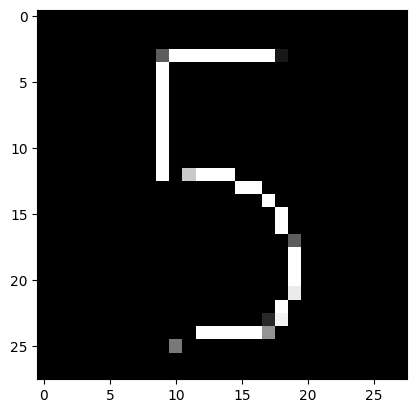

In [ ]:
plt.imshow(img_2.reshape(28,28), cmap="gray")
plt.show()

In [ ]:
# image with marign to the left "number 5" Third_Try
img_3 = cv2.imread("image_3.png", cv2.IMREAD_GRAYSCALE)

# 2. Resize to 28x28
img_3 = cv2.resize(img_3, (28, 28))

# 3. Normalize (0-1)
img_3 = img_3 / 255.0

# 4. Reshape to match model input
img_3 = img_3.reshape(1, 28, 28)

# 5. Predict
prediction = model.predict(img_3)
print("Prediction:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: 2


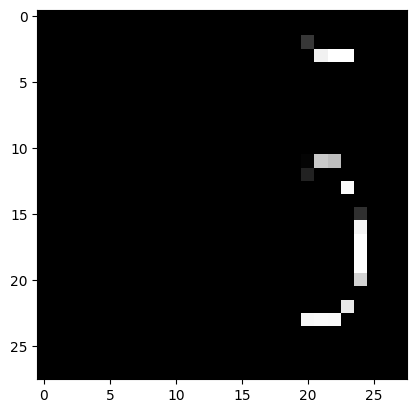

In [ ]:
plt.imshow(img_3.reshape(28,28), cmap="gray")
plt.show()

# Task 3 — Epoch-Based Learning Curve Exploration

In [ ]:
model_5_epoches = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_5_epoches.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model_5_epoches.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val)
)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8766 - loss: 0.4432 - val_accuracy: 0.9698 - val_loss: 0.1148
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9625 - loss: 0.1293 - val_accuracy: 0.9700 - val_loss: 0.1044
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9763 - loss: 0.0807 - val_accuracy: 0.9730 - val_loss: 0.0943
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9823 - loss: 0.0613 - val_accuracy: 0.9792 - val_loss: 0.0700
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9874 - loss: 0.0436 - val_accuracy: 0.9762 - val_loss: 0.0827


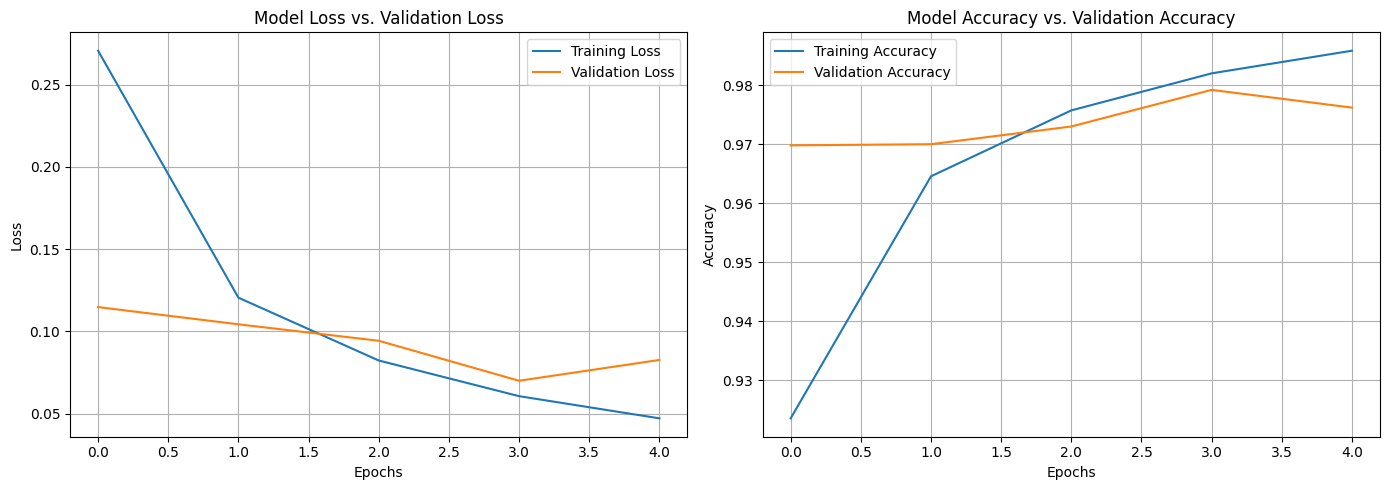

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Model Loss vs. Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Model Accuracy vs. Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
model_10_epoches = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_10_epoches.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model_10_epoches.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
    )

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8742 - loss: 0.4473 - val_accuracy: 0.9676 - val_loss: 0.1194
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9632 - loss: 0.1273 - val_accuracy: 0.9704 - val_loss: 0.0974
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9752 - loss: 0.0841 - val_accuracy: 0.9776 - val_loss: 0.0786
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9818 - loss: 0.0601 - val_accuracy: 0.9750 - val_loss: 0.0887
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9855 - loss: 0.0478 - val_accuracy: 0.9798 - val_loss: 0.0668
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9897 - loss: 0.0331 - val_accuracy: 0.9770 - val_loss: 0.0873
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9926 - loss: 0.0261 - val_accuracy: 0.9780 - val_loss: 0.0814
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9932 - loss: 0.0211 - 

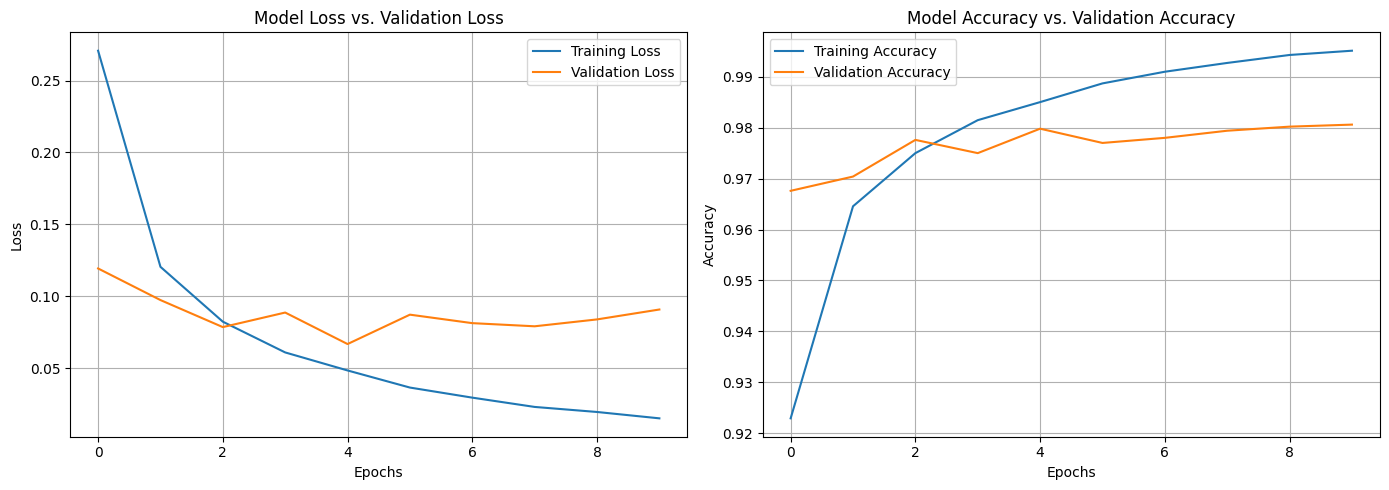

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Model Loss vs. Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Model Accuracy vs. Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
model_20_epoches = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_20_epoches.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model_20_epoches.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val)
)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8693 - loss: 0.4582 - val_accuracy: 0.9674 - val_loss: 0.1178
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9620 - loss: 0.1322 - val_accuracy: 0.9738 - val_loss: 0.0912
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9735 - loss: 0.0842 - val_accuracy: 0.9736 - val_loss: 0.0874
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9827 - loss: 0.0585 - val_accuracy: 0.9784 - val_loss: 0.0730
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9872 - loss: 0.0446 - val_accuracy: 0.9780 - val_loss: 0.0732
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9890 - loss: 0.0360 - val_accuracy: 0.9786 - val_loss: 0.0723
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9914 - loss: 0.0281 - val_accuracy: 0.9780 - val_loss: 0.0855
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9931 - loss: 0.0233 - 

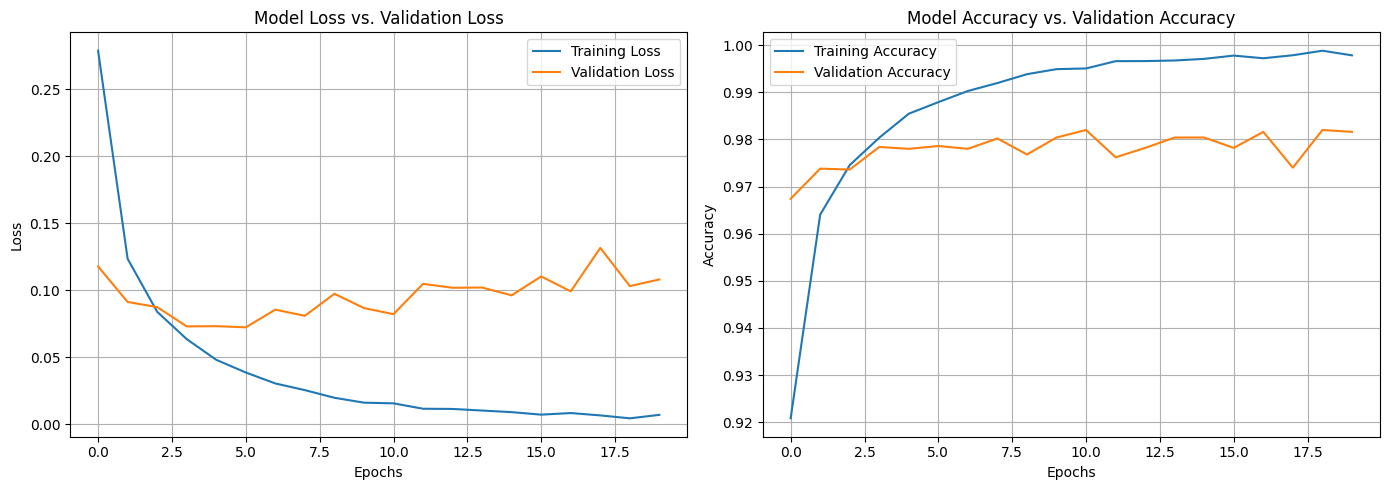

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Model Loss vs. Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Model Accuracy vs. Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Task 4 — EarlyStopping Behavior Analysis

In [ ]:
model_with_callBack_patience_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_with_callBack_patience_3.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_with_callBack_patience_3.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8669 - loss: 0.4635 - val_accuracy: 0.9668 - val_loss: 0.1210
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9614 - loss: 0.1317 - val_accuracy: 0.9776 - val_loss: 0.0875
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9758 - loss: 0.0828 - val_accuracy: 0.9778 - val_loss: 0.0839
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9816 - loss: 0.0595 - val_accuracy: 0.9746 - val_loss: 0.0899
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9863 - loss: 0.0454 - val_accuracy: 0.9752 - val_loss: 0.0944
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9883 - loss: 0.0379 - val_accuracy: 0.9814 - val_loss: 0.0753
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9914 - loss: 0.0281 - val_accuracy: 0.9798 - val_loss: 0.0779
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9936 - loss: 0.0228 - 

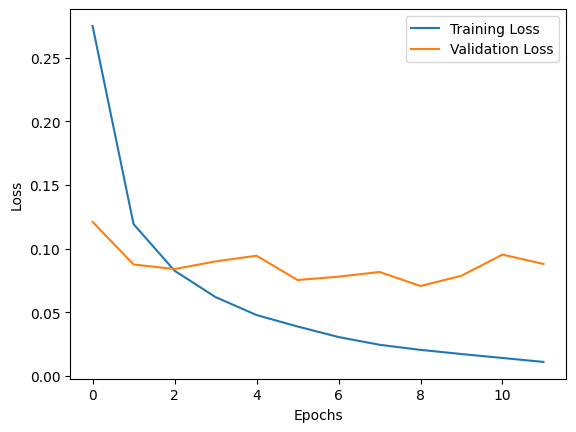

In [ ]:
# Plot Training vs Validation Loss for patience=3
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model_with_callBack_patience_5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_with_callBack_patience_5.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
]

history = model_with_callBack_patience_5.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8705 - loss: 0.4580 - val_accuracy: 0.9644 - val_loss: 0.1264
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9617 - loss: 0.1336 - val_accuracy: 0.9728 - val_loss: 0.0900
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9754 - loss: 0.0838 - val_accuracy: 0.9768 - val_loss: 0.0787
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9809 - loss: 0.0612 - val_accuracy: 0.9782 - val_loss: 0.0734
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9854 - loss: 0.0470 - val_accuracy: 0.9790 - val_loss: 0.0702
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9891 - loss: 0.0352 - val_accuracy: 0.9810 - val_loss: 0.0779
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9912 - loss: 0.0290 - val_accuracy: 0.9822 - val_loss: 0.0669
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9941 - loss: 0.0214 - 

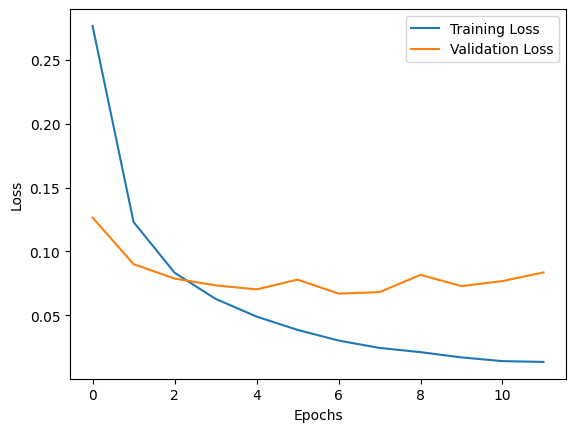

In [ ]:
# Plot Training vs Validation Loss for patience=5
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Task 5 — Dropout Ablation Study

In [ ]:
model_with_No_dropout = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_with_No_dropout.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_with_No_dropout.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8753 - loss: 0.4463 - val_accuracy: 0.9684 - val_loss: 0.1187
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9629 - loss: 0.1291 - val_accuracy: 0.9748 - val_loss: 0.0889
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9749 - loss: 0.0849 - val_accuracy: 0.9758 - val_loss: 0.0771
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9831 - loss: 0.0563 - val_accuracy: 0.9760 - val_loss: 0.0820
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9861 - loss: 0.0463 - val_accuracy: 0.9800 - val_loss: 0.0726
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9905 - loss: 0.0317 - val_accuracy: 0.9788 - val_loss: 0.0784
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9924 - loss: 0.0266 - val_accuracy: 0.9786 - val_loss: 0.0769
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9935 - loss: 0.0221 - 

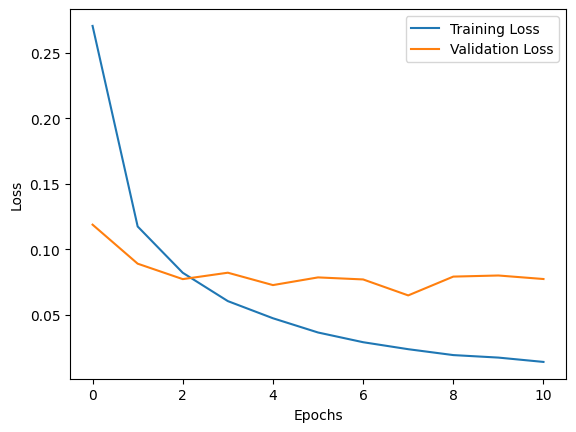

In [ ]:
# Plot Training vs Validation Loss for no dropout
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model_with_dropout_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

model_with_dropout_1.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_with_dropout_1.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8582 - loss: 0.4863 - val_accuracy: 0.9648 - val_loss: 0.1222
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9584 - loss: 0.1439 - val_accuracy: 0.9740 - val_loss: 0.0886
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9725 - loss: 0.0958 - val_accuracy: 0.9778 - val_loss: 0.0782
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9768 - loss: 0.0753 - val_accuracy: 0.9786 - val_loss: 0.0726
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9819 - loss: 0.0573 - val_accuracy: 0.9824 - val_loss: 0.0699
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9853 - loss: 0.0481 - val_accuracy: 0.9798 - val_loss: 0.0770
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9871 - loss: 0.0410 - val_accuracy: 0.9800 - val_loss: 0.0732
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9892 - loss: 0.0343 - 

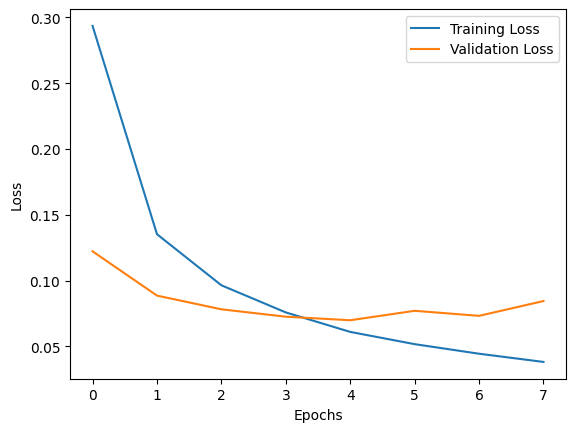

In [ ]:
# Plot Training vs Validation Loss for dropout = 10%
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model_with_dropout_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

model_with_dropout_2.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_with_dropout_2.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8393 - loss: 0.5392 - val_accuracy: 0.9636 - val_loss: 0.1300
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9448 - loss: 0.1833 - val_accuracy: 0.9708 - val_loss: 0.0925
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9587 - loss: 0.1367 - val_accuracy: 0.9786 - val_loss: 0.0772
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9653 - loss: 0.1154 - val_accuracy: 0.9772 - val_loss: 0.0786
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9693 - loss: 0.0964 - val_accuracy: 0.9784 - val_loss: 0.0747
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9722 - loss: 0.0880 - val_accuracy: 0.9774 - val_loss: 0.0793
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9751 - loss: 0.0755 - val_accuracy: 0.9812 - val_loss: 0.0710
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9757 - loss: 0.0737 - 

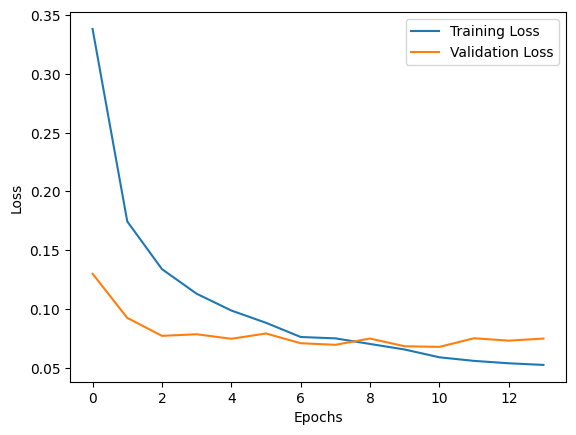

In [ ]:
# Plot Training vs Validation Loss for dropout = 30%
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Task 6 — L2 Regularization Experiment

In [ ]:
model_with_l2_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu",kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

model_with_l2_1.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_with_l2_1.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8654 - loss: 0.4943 - val_accuracy: 0.9660 - val_loss: 0.1510
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9557 - loss: 0.1757 - val_accuracy: 0.9734 - val_loss: 0.1242
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9689 - loss: 0.1388 - val_accuracy: 0.9790 - val_loss: 0.1093
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9727 - loss: 0.1206 - val_accuracy: 0.9790 - val_loss: 0.1077
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9772 - loss: 0.1101 - val_accuracy: 0.9824 - val_loss: 0.1056
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9784 - loss: 0.1057 - val_accuracy: 0.9776 - val_loss: 0.1104
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9819 - loss: 0.0979 - val_accuracy: 0.9816 - val_loss: 0.1076
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9822 - loss: 0.0938 - 

In [ ]:
model_with_l2_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

model_with_l2_2.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_with_l2_2.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8603 - loss: 0.6155 - val_accuracy: 0.9620 - val_loss: 0.2379
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9489 - loss: 0.2666 - val_accuracy: 0.9714 - val_loss: 0.1950
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9590 - loss: 0.2243 - val_accuracy: 0.9726 - val_loss: 0.1820
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9631 - loss: 0.2074 - val_accuracy: 0.9750 - val_loss: 0.1744
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9653 - loss: 0.1959 - val_accuracy: 0.9766 - val_loss: 0.1683
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9665 - loss: 0.1922 - val_accuracy: 0.9752 - val_loss: 0.1641
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9675 - loss: 0.1840 - val_accuracy: 0.9728 - val_loss: 0.1742
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9693 - loss: 0.1806 - 

In [ ]:
model_with_l2_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu",kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

model_with_l2_3.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_with_l2_3.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8469 - loss: 1.0331 - val_accuracy: 0.9488 - val_loss: 0.3709
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9186 - loss: 0.4421 - val_accuracy: 0.9524 - val_loss: 0.3320
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9286 - loss: 0.3937 - val_accuracy: 0.9626 - val_loss: 0.3052
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9341 - loss: 0.3758 - val_accuracy: 0.9646 - val_loss: 0.2828
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9372 - loss: 0.3551 - val_accuracy: 0.9646 - val_loss: 0.2889
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9421 - loss: 0.3403 - val_accuracy: 0.9604 - val_loss: 0.2817
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9397 - loss: 0.3454 - val_accuracy: 0.9614 - val_loss: 0.2817
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9423 - loss: 0.3294 - 

# Task 7 — Optimizer Comparison Challenge

In [ ]:
SGD_1 = SGD(
    learning_rate=0.01,
    momentum=0.0
)
SGD_2 = SGD(
    learning_rate=0.01,
    momentum=0.9
)
AdamW = AdamW(
    learning_rate=1e-3,
    weight_decay=1e-4
)

In [ ]:
model_with_sgd_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

model_with_sgd_1.compile(optimizer=SGD_1,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_with_sgd_1.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6880 - loss: 1.1289 - val_accuracy: 0.9184 - val_loss: 0.3231
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8825 - loss: 0.4107 - val_accuracy: 0.9316 - val_loss: 0.2552
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9040 - loss: 0.3361 - val_accuracy: 0.9386 - val_loss: 0.2257
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9134 - loss: 0.3041 - val_accuracy: 0.9452 - val_loss: 0.2020
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9242 - loss: 0.2664 - val_accuracy: 0.9500 - val_loss: 0.1857
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9299 - loss: 0.2481 - val_accuracy: 0.9552 - val_loss: 0.1704
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9351 - loss: 0.2290 - val_accuracy: 0.9588 - val_loss: 0.1603
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9393 - loss: 0.2143 - 

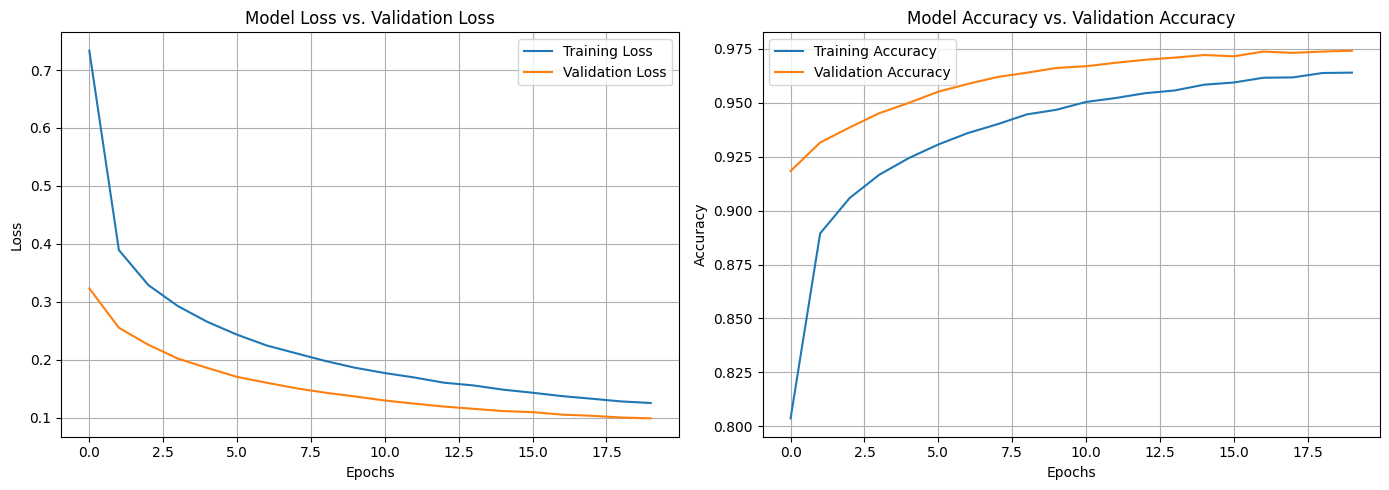

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Model Loss vs. Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Model Accuracy vs. Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
model_with_sgd_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

model_with_sgd_2.compile(optimizer=SGD_2,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_with_sgd_2.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8408 - loss: 0.5419 - val_accuracy: 0.9660 - val_loss: 0.1428
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9489 - loss: 0.1787 - val_accuracy: 0.9740 - val_loss: 0.0982
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9622 - loss: 0.1285 - val_accuracy: 0.9766 - val_loss: 0.0851
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9713 - loss: 0.1015 - val_accuracy: 0.9786 - val_loss: 0.0807
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9742 - loss: 0.0867 - val_accuracy: 0.9804 - val_loss: 0.0776
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9778 - loss: 0.0759 - val_accuracy: 0.9800 - val_loss: 0.0707
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9793 - loss: 0.0651 - val_accuracy: 0.9822 - val_loss: 0.0675
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9828 - loss: 0.0585 - 

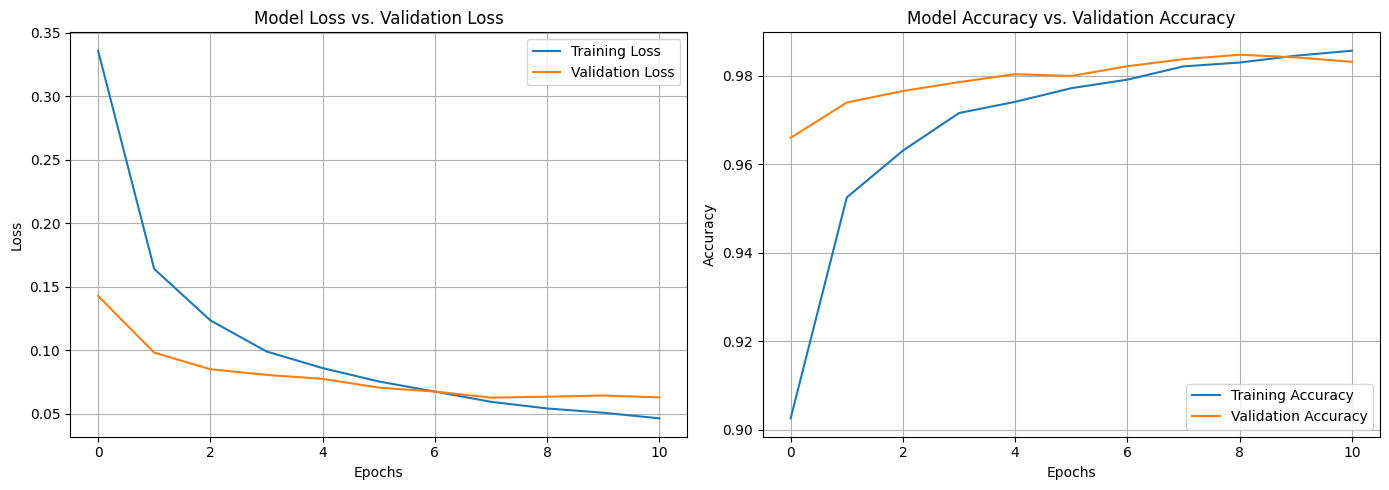

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Model Loss vs. Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Model Accuracy vs. Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
model_with_adam = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

model_with_adam.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_with_adam.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8611 - loss: 0.4870 - val_accuracy: 0.9688 - val_loss: 0.1150
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9590 - loss: 0.1423 - val_accuracy: 0.9740 - val_loss: 0.0959
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9711 - loss: 0.0957 - val_accuracy: 0.9786 - val_loss: 0.0798
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9764 - loss: 0.0767 - val_accuracy: 0.9792 - val_loss: 0.0717
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9799 - loss: 0.0614 - val_accuracy: 0.9814 - val_loss: 0.0716
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9840 - loss: 0.0506 - val_accuracy: 0.9780 - val_loss: 0.0823
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9855 - loss: 0.0442 - val_accuracy: 0.9790 - val_loss: 0.0779
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9884 - loss: 0.0375 - 

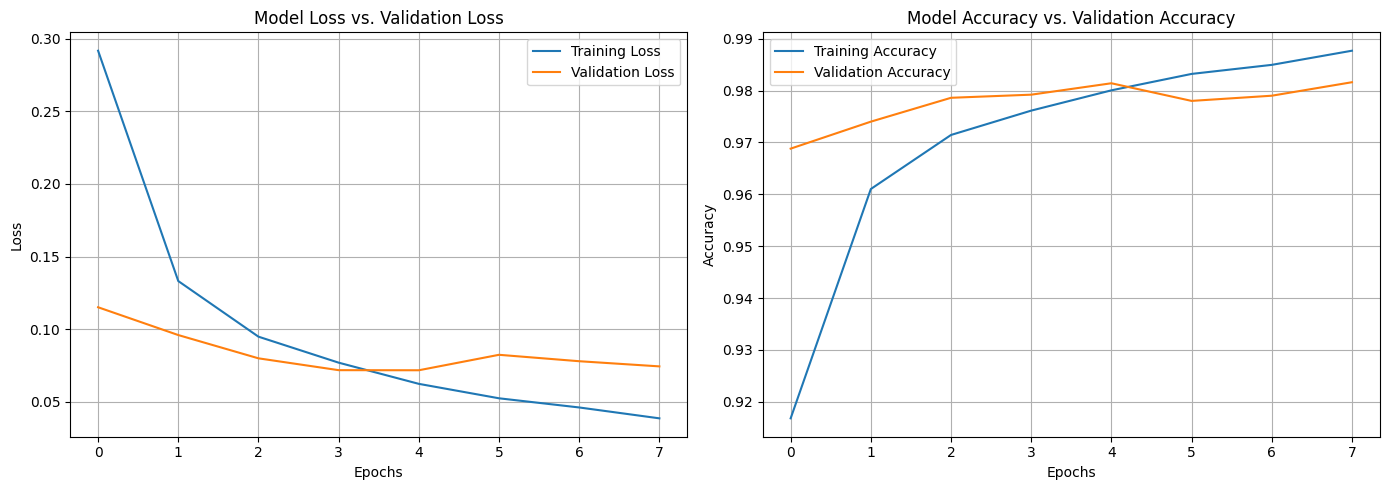

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Model Loss vs. Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Model Accuracy vs. Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
model_with_adamW = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

model_with_adamW.compile(optimizer=AdamW,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_with_adamW.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8607 - loss: 0.4773 - val_accuracy: 0.9656 - val_loss: 0.1260
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9587 - loss: 0.1393 - val_accuracy: 0.9746 - val_loss: 0.0905
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9703 - loss: 0.0980 - val_accuracy: 0.9786 - val_loss: 0.0805
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9759 - loss: 0.0767 - val_accuracy: 0.9784 - val_loss: 0.0747
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9806 - loss: 0.0638 - val_accuracy: 0.9792 - val_loss: 0.0697
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9831 - loss: 0.0517 - val_accuracy: 0.9800 - val_loss: 0.0728
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9854 - loss: 0.0449 - val_accuracy: 0.9804 - val_loss: 0.0729
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9882 - loss: 0.0372 - 

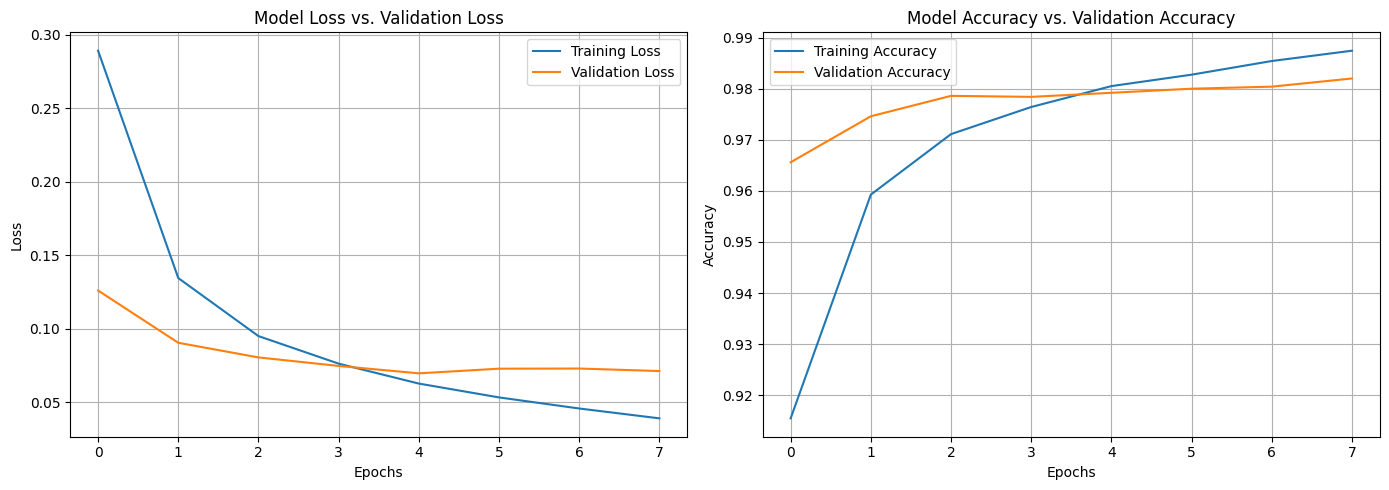

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Model Loss vs. Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Model Accuracy vs. Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Task 8 — Batch Size & Gradient Noise Experiment

In [ ]:
model_with_8_batches = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

model_with_8_batches.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_with_8_batches.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=8,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

Epoch 1/20
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8905 - loss: 0.3790 - val_accuracy: 0.9712 - val_loss: 0.1047
Epoch 2/20
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9637 - loss: 0.1212 - val_accuracy: 0.9772 - val_loss: 0.0887
Epoch 3/20
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9745 - loss: 0.0830 - val_accuracy: 0.9782 - val_loss: 0.0849
Epoch 4/20
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9785 - loss: 0.0685 - val_accuracy: 0.9786 - val_loss: 0.0837
Epoch 5/20
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9818 - loss: 0.0565 - val_accuracy: 0.9790 - val_loss: 0.0896
Epoch 6/20
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9835 - loss: 0.0504 - val_accuracy: 0.9788 - val_loss: 0.0966
Epoch 7/20
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9855 - loss: 0.0437 - val_accuracy: 0.9810 - val_loss: 0.0915


In [ ]:
model_with_32_batches = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

model_with_32_batches.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_with_32_batches.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8623 - loss: 0.4784 - val_accuracy: 0.9678 - val_loss: 0.1138
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9580 - loss: 0.1398 - val_accuracy: 0.9774 - val_loss: 0.0872
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9712 - loss: 0.0920 - val_accuracy: 0.9792 - val_loss: 0.0729
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9762 - loss: 0.0744 - val_accuracy: 0.9786 - val_loss: 0.0750
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9816 - loss: 0.0577 - val_accuracy: 0.9818 - val_loss: 0.0622
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9839 - loss: 0.0508 - val_accuracy: 0.9796 - val_loss: 0.0767
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9857 - loss: 0.0433 - val_accuracy: 0.9816 - val_loss: 0.0674
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9880 - loss: 0.0356 - 

In [ ]:
model_with_128_batches = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

model_with_128_batches.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_with_128_batches.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

Epoch 1/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8107 - loss: 0.6736 - val_accuracy: 0.9574 - val_loss: 0.1648
Epoch 2/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9419 - loss: 0.1962 - val_accuracy: 0.9682 - val_loss: 0.1222
Epoch 3/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9580 - loss: 0.1464 - val_accuracy: 0.9732 - val_loss: 0.0976
Epoch 4/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9659 - loss: 0.1164 - val_accuracy: 0.9766 - val_loss: 0.0835
Epoch 5/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9718 - loss: 0.0958 - val_accuracy: 0.9768 - val_loss: 0.0805
Epoch 6/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9762 - loss: 0.0794 - val_accuracy: 0.9788 - val_loss: 0.0762
Epoch 7/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9785 - loss: 0.0711 - val_accuracy: 0.9790 - val_loss: 0.0750
Epoch 8/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9820 - loss: 0.0605 - val_accuracy: 0.

# Task 9 — Activation Function Swap (ReLU vs Tanh vs GELU)

In [7]:
model_with_Tanh = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="tanh"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

model_with_Tanh.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_with_Tanh.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8635 - loss: 0.4707 - val_accuracy: 0.9572 - val_loss: 0.1496
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9478 - loss: 0.1776 - val_accuracy: 0.9702 - val_loss: 0.1070
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9630 - loss: 0.1243 - val_accuracy: 0.9742 - val_loss: 0.0902
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9697 - loss: 0.0978 - val_accuracy: 0.9764 - val_loss: 0.0848
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9764 - loss: 0.0782 - val_accuracy: 0.9782 - val_loss: 0.0761
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9801 - loss: 0.0655 - val_accuracy: 0.9790 - val_loss: 0.0726
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9830 - loss: 0.0541 - val_accuracy: 0.9778 - val_loss: 0.0823
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9863 - loss: 0.0485 - 

In [8]:
model_with_Softsign = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="softsign"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

model_with_Softsign.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_with_Softsign.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8598 - loss: 0.5062 - val_accuracy: 0.9532 - val_loss: 0.1740
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9439 - loss: 0.1936 - val_accuracy: 0.9660 - val_loss: 0.1268
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9572 - loss: 0.1471 - val_accuracy: 0.9696 - val_loss: 0.1059
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9658 - loss: 0.1171 - val_accuracy: 0.9730 - val_loss: 0.0935
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9704 - loss: 0.0965 - val_accuracy: 0.9724 - val_loss: 0.0916
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9741 - loss: 0.0847 - val_accuracy: 0.9724 - val_loss: 0.0945
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9769 - loss: 0.0764 - val_accuracy: 0.9774 - val_loss: 0.0767
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9789 - loss: 0.0685 - 

In [9]:
model_with_GELU = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="gelu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

model_with_GELU.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_with_GELU.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8705 - loss: 0.4553 - val_accuracy: 0.9672 - val_loss: 0.1149
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9613 - loss: 0.1308 - val_accuracy: 0.9754 - val_loss: 0.0905
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9707 - loss: 0.0944 - val_accuracy: 0.9758 - val_loss: 0.0838
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9782 - loss: 0.0687 - val_accuracy: 0.9782 - val_loss: 0.0764
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9830 - loss: 0.0531 - val_accuracy: 0.9804 - val_loss: 0.0721
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9862 - loss: 0.0429 - val_accuracy: 0.9812 - val_loss: 0.0698
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9889 - loss: 0.0353 - val_accuracy: 0.9780 - val_loss: 0.0824
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9894 - loss: 0.0316 - 

# Task 10 — Weight Inspection & Model Capacity Analysis

In [ ]:
w, b = model.layers[1].get_weights()
print(w.shape)

(784, 128)


In [ ]:
df_w = pd.DataFrame(w)
df_w.describe().T

,count,mean,std,min,25%,50%,75%,max
0,784.0,-0.067672,0.248172,-1.121650,-0.201185,-0.019777,0.078444,0.567184
1,784.0,-0.025170,0.196038,-0.810136,-0.142514,-0.009413,0.089583,0.867254
2,784.0,0.000708,0.219258,-0.597815,-0.131727,0.000813,0.127587,0.708735
3,784.0,0.002861,0.207317,-0.815915,-0.103572,0.009236,0.122557,0.686432
4,784.0,-0.010805,0.220384,-0.906175,-0.114924,-0.002639,0.104750,0.682999
...,...,...,...,...,...,...,...,...
123,784.0,0.022856,0.235712,-1.179159,-0.080178,0.033492,0.143620,0.870281
124,784.0,-0.006234,0.046849,-0.099621,-0.047222,-0.006714,0.033235,0.080557
125,784.0,-0.007645,0.199241,-0.783250,-0.104634,0.001411,0.106455,0.675802
126,784.0,0.006419,0.218313,-0.883166,-0.118867,0.009534,0.129524,0.818514


In [ ]:
w, b = model_with_callBack_patience_3.layers[1].get_weights()
print(w.shape)

(784, 128)


In [ ]:
df_w = pd.DataFrame(w)
df_w.describe().T

,count,mean,std,min,25%,50%,75%,max
0,784.0,-0.022483,0.147538,-0.544434,-0.109067,-0.022580,0.069125,0.452884
1,784.0,-0.001867,0.159780,-0.631494,-0.085261,0.001112,0.088528,0.565551
2,784.0,0.006674,0.131970,-0.424996,-0.072058,0.006829,0.086347,0.434597
3,784.0,-0.004397,0.158644,-0.972303,-0.064427,0.005841,0.074977,0.453528
4,784.0,0.005364,0.137219,-0.462872,-0.088223,-0.000155,0.090226,0.468670
...,...,...,...,...,...,...,...,...
123,784.0,-0.022481,0.149768,-0.565550,-0.107807,-0.019146,0.070895,0.445943
124,784.0,0.000674,0.138183,-0.447119,-0.089446,0.006345,0.087438,0.381866
125,784.0,-0.035199,0.140145,-0.493878,-0.123381,-0.025698,0.051245,0.492980
126,784.0,-0.000267,0.145094,-0.516697,-0.079579,0.010227,0.082606,0.466572


In [ ]:
w, b = model_with_dropout_2.layers[1].get_weights()
print(w.shape)

(784, 128)


In [ ]:
df_w = pd.DataFrame(w)
df_w.describe().T

,count,mean,std,min,25%,50%,75%,max
0,784.0,-0.027374,0.174262,-0.630663,-0.121866,-0.023066,0.074000,0.597199
1,784.0,-0.015072,0.164682,-0.615978,-0.105966,-0.014315,0.072436,0.669068
2,784.0,-0.017802,0.150169,-0.500684,-0.106160,-0.018684,0.069528,0.540638
3,784.0,-0.006823,0.142558,-0.580681,-0.077150,-0.008804,0.073042,0.519164
4,784.0,0.005461,0.151799,-0.456028,-0.080164,0.004403,0.089560,0.641989
...,...,...,...,...,...,...,...,...
123,784.0,-0.010231,0.153250,-0.543698,-0.089800,-0.008960,0.075195,0.475521
124,784.0,-0.021430,0.156138,-0.545542,-0.110900,-0.012731,0.070002,0.665193
125,784.0,-0.005355,0.151123,-0.590155,-0.081279,-0.001978,0.075014,0.721068
126,784.0,-0.009604,0.161653,-0.777097,-0.091593,0.005757,0.081855,0.523836


In [ ]:
w, b = model_with_l2_3.layers[1].get_weights()
print(w.shape)

(784, 128)


In [ ]:
df_w = pd.DataFrame(w)
df_w.describe().T

,count,mean,std,min,25%,50%,75%,max
0,784.0,1.977455e-04,0.007909,-0.028477,-2.062547e-03,-1.923492e-41,1.784446e-03,0.047046
1,784.0,8.532754e-09,0.000003,-0.000040,-1.449643e-41,-1.097917e-42,1.559225e-41,0.000056
2,784.0,-3.180695e-03,0.012711,-0.047881,-8.325073e-03,-2.405149e-06,2.135782e-05,0.054982
3,784.0,-1.561737e-03,0.004390,-0.022144,-2.989262e-03,-2.830625e-11,2.335406e-07,0.010017
4,784.0,-1.617050e-04,0.000825,-0.003731,-1.694914e-04,-8.080164e-17,2.260343e-11,0.005025
...,...,...,...,...,...,...,...,...
123,784.0,2.207486e-03,0.013441,-0.056905,-6.366431e-04,4.899742e-21,5.354895e-03,0.065851
124,784.0,1.773297e-03,0.011780,-0.055053,-9.566415e-04,5.612750e-26,6.525300e-03,0.040928
125,784.0,-5.760865e-08,0.000005,-0.000102,-1.665794e-41,-7.847271e-44,1.711091e-41,0.000066
126,784.0,-2.888914e-04,0.015684,-0.069562,-5.153794e-03,-1.444038e-41,1.514513e-03,0.095557
